First of all we have to find most correlative parameters from Temporary Data.

In [77]:
"""
Created on Sunday Nov 2 21:47:20 2022

@author: Ahmet Sina Soykan, Mehmet Sait Karanfil
"""

import pandas as pd                                   #importing necessary libraries
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

data=pd.read_excel("Temporary_data3_-_Copy.xlsx")     #read the file and synchronize it "data"
pd.options.display.max_rows=999                       #display options
pd.options.display.max_columns=999                    #display options
data.corr()["CDRGLOB"].sort_values()                  #sort CDRGLOB values

NACCMMSE   -0.746660
RENTM      -0.478207
LENTM      -0.453646
HIPPOVOL   -0.449069
LHIPPO     -0.442185
RHIPPO     -0.424068
LISTHCM    -0.372906
RPARHIPM   -0.371822
LSUPTEMM   -0.367520
RISTHCM    -0.349977
RSUPTEMM   -0.348159
LPARHIPM   -0.338774
TEMPCOR    -0.335349
RFUSM      -0.335226
LTEMPCOR   -0.331856
LINFTEMM   -0.331250
RTEMPCOR   -0.324375
LMIDTEMP   -0.321429
LSUPFRM    -0.314413
RSUPFRM    -0.304840
RENT       -0.303384
RINFTEMP   -0.303036
RINFTEMM   -0.300374
LINFTEMP   -0.298785
LMIDTEMM   -0.295086
LENT       -0.294774
RPARCENM   -0.287871
RMIDTEMP   -0.278875
LLATORBM   -0.277958
RSUPMARM   -0.268851
RINSULAM   -0.267324
RSUPTEM    -0.266458
RLINGM     -0.266026
LSUPTEM    -0.261966
LPOSCINM   -0.261619
RMEDORBM   -0.260876
RPARHIP    -0.260860
RSUPPARM   -0.259512
LFUSM      -0.259396
LPRECENM   -0.255781
RPERCALM   -0.253505
LCACM      -0.253323
LINSULAM   -0.250077
RPRECUNM   -0.248733
CEREGR     -0.245501
LMEDORBM   -0.245250
LLINGM     -0.245117
LPARCENM   -0

After finding most correlative parameters we chose 4 of them. If we find good related parameters to CDRGLOB then we have to eleminate less correlative ones. The chosen parameters are NACCMMSE, RENTM, APA, INDEPEND.

In [78]:
Naccmms= data["NACCMMSE"]+15                                    #read "NACCMMSE" from data and shift it
Rentm= data["RENTM"]+15                                         #read "RENTM" from data and shift it
Apa=data["APA"]+15                                              #read "APA" from data and shift it
Independ=data["INDEPEND"]+15                                    #read "INDEPEND" from data and shift it

data_calculatedpozitif=((Independ)*(Apa)*2)**(1/50)             #Right proportion numbers
data_calculatednegatif=((Naccmms)*(Rentm)*5)**(1/50)            #Inversely proportional numbers
data_calculated=data_calculatedpozitif/data_calculatednegatif   #making a real parameter that the most correlative with CDRGLOB

df = pd.DataFrame(data_calculated)                              #make data_calculated to DataFrame
labels=data["CDRGLOB"]                                          #read "CDRGLOB" from data and synchronise it as "labels"
label_df = pd.DataFrame(labels)                                 #make labels to DataFrame
label_df ["CDR"] = df.iloc[:,0]
label_df.corr()                                                 #Display correlations between CDRGLOB and our new parameters

,CDRGLOB,CDR
CDRGLOB,1.000000,0.801801
CDR,0.801801,1.000000


We can see the correlation results for 4 values in CDRGLOB

In [86]:
Cut_CDR = pd.qcut(label_df["CDR"], 10)                                    #Cut CDR to 10 pieces
label_df.pivot_table(index="CDRGLOB", columns=Cut_CDR, aggfunc="count")   #making pivot table between CDRGLOB and CDR

CDR                                                   \
CDR     (0.9557, 0.9573] (0.9573, 0.9576] (0.9576, 0.958] (0.958, 0.9583]   
CDRGLOB                                                                     
0                    121              114             102             105   
1                     15               21              33              30   
2                      0                0               0               1   
3                      0                0               0               0   

                                                                             \
CDR     (0.9583, 0.9588] (0.9588, 0.9595] (0.9595, 0.9608] (0.9608, 0.9622]   
CDRGLOB                                                                       
0                     96               67               31                9   
1                     36               63               98              106   
2                      3                5                7               20   
3                      0                0                0                0   

                                           
CDR     (0.9622, 0.9647] (0.9647, 0.9771]  
CDRGLOB                                    
0                      1                0  
1                     74               20  
2                     57               72  
3                      3               44

A Visual illustration for the Hippovol and CDR

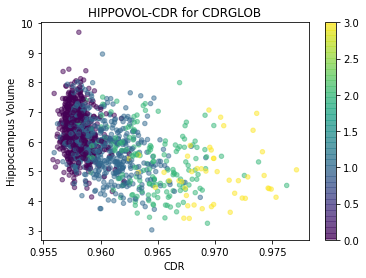

In [88]:
x = label_df ["CDR"]                                            # X equals to CDR values
y = data["HIPPOVOL"]                                            # Y equals to Hippovol values
labels = data["CDRGLOB"]                                        # labels equals to CDRGLOB values
plt.scatter(x, y, s=20, cmap = "viridis", c=labels, alpha=0.5)  # Plot this values
plt.xlabel("CDR")
plt.ylabel("Hippocampus Volume")
plt.title("HIPPOVOL-CDR for CDRGLOB")
plt.colorbar()
plt.show()